In [1]:
library(ggplot2)

ds <- read.csv('Assignment 3 Laws/DataAssignment3.csv', sep=',')

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang


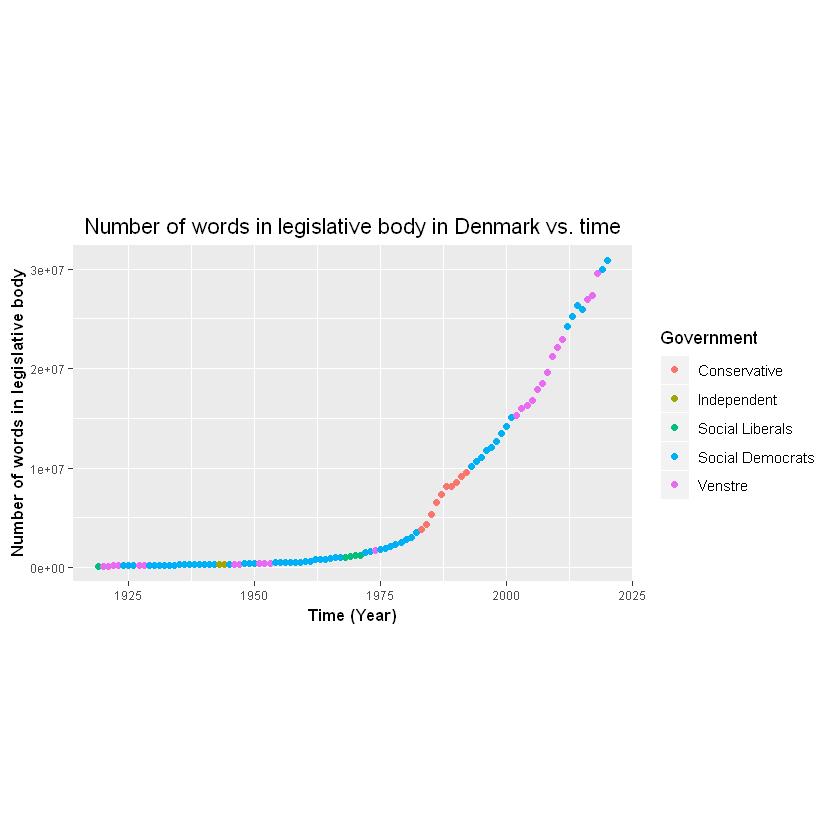

In [2]:
p1 <- ggplot(ds, aes(Date, NumberWords, colour=Government), colour="black") + 
    geom_point() + 
    theme(
        aspect.ratio=0.6, 
        axis.text=element_text(size=7), 
        axis.title=element_text(size=10, face="bold"),
        plot.title = element_text(hjust = 0.5)
    ) +
    labs(x="Time (Year)", y="Number of words in legislative body", size = 600) +
    ggtitle("Number of words in legislative body in Denmark vs. time")

#ggsave(file="scatter.png", plot=p1, width=7)
p1

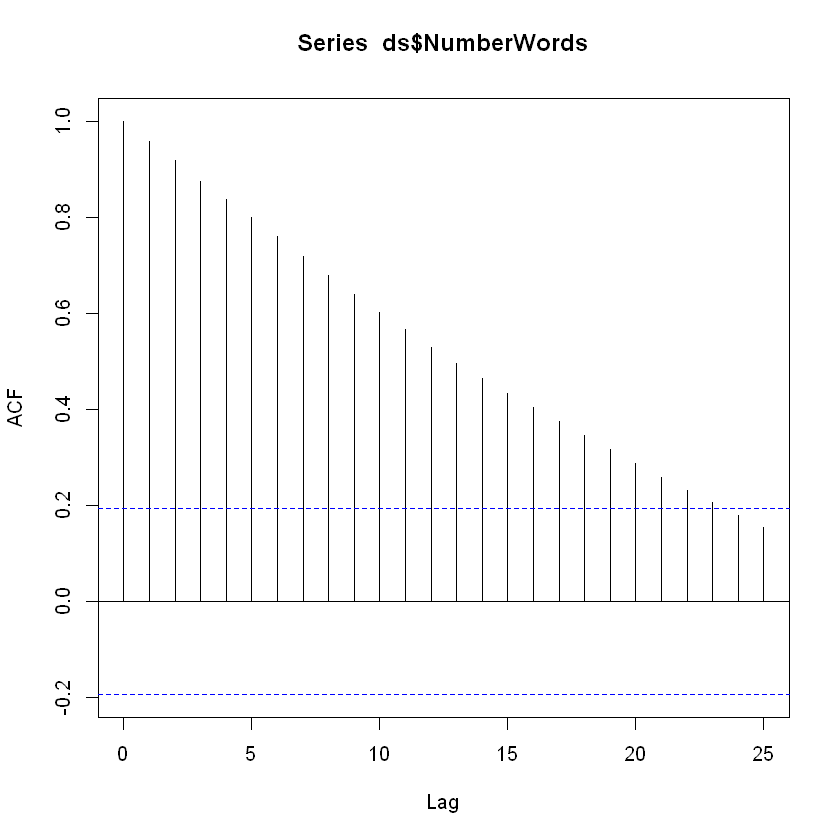

In [3]:
acf(ds$NumberWords, lag.max=25)

**Does not seem stationary**

# Using log-transform

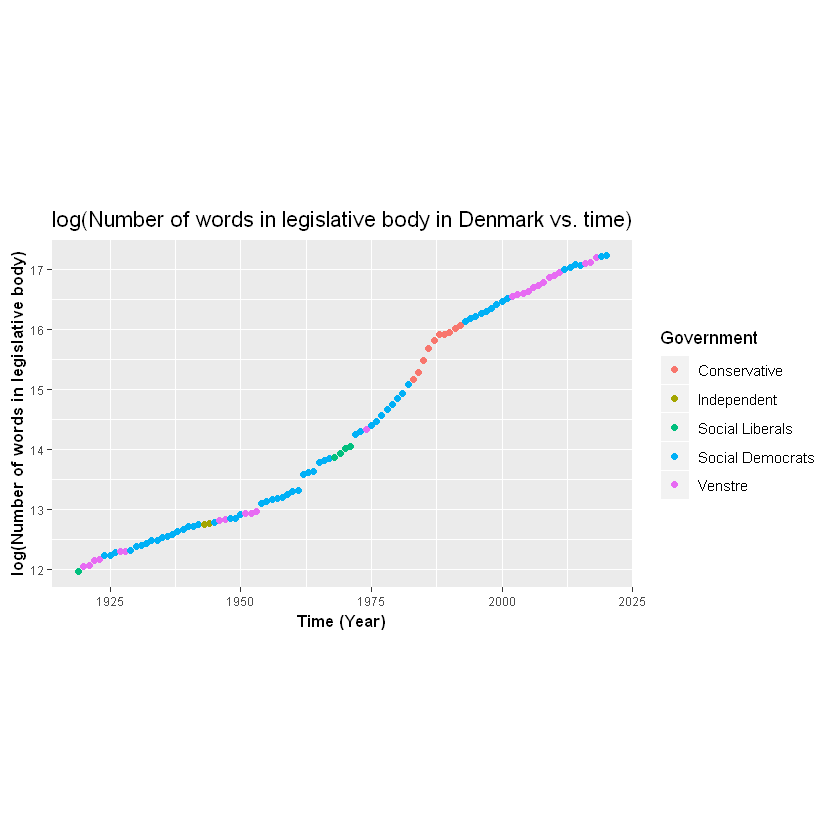

In [10]:
ds_log <- data.frame(
    Date = ds$Date,
    NumberWords = log(ds$NumberWords),
    Government = ds$Government
)


p1 <- ggplot(ds_log, aes(Date, NumberWords, colour=Government), colour="black") + 
    geom_point() + 
    theme(
        aspect.ratio=0.6, 
        axis.text=element_text(size=7), 
        axis.title=element_text(size=10, face="bold"),
        plot.title = element_text(hjust = 0.5)
    ) +
    labs(x="Time (Year)", y="log(Number of words in legislative body)", size = 600) +
    ggtitle("log(Number of words in legislative body in Denmark vs. time)")

#ggsave(file="scatter.png", plot=p1, width=7)
p1

# Differencing

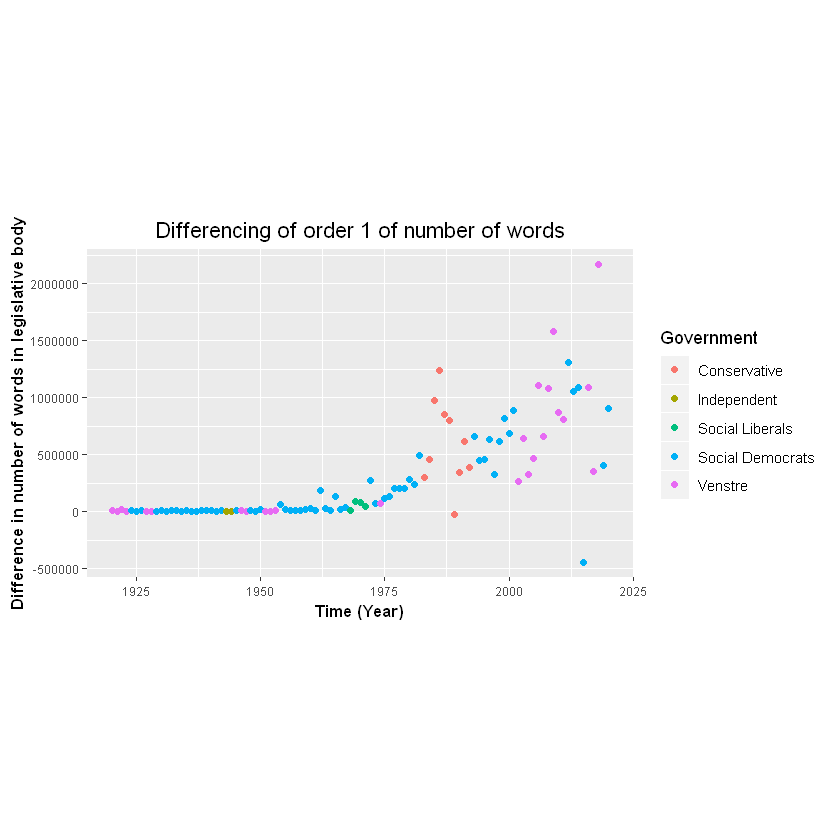

In [4]:
N <- length(ds$NumberWords)
diff_ds_order_1 <- data.frame(
    Date <- ds$Date[2:N],
    NumberWords = ds$NumberWords[2:N] - ds$NumberWords[1:(N-1)],
    Government=ds$Government[2:N]
)  # Use command diff instead!

p1 <- ggplot(diff_ds_order_1, aes(Date, NumberWords, colour=Government), colour="black") + 
    geom_point() + 
    theme(
        aspect.ratio=0.6, 
        axis.text=element_text(size=7), 
        axis.title=element_text(size=10, face="bold"),
        plot.title = element_text(hjust = 0.5)
    ) +
    labs(x="Time (Year)", y="Difference in number of words in legislative body", size = 600) +
    ggtitle("Differencing of order 1 of number of words")

#ggsave(file="scatter.png", plot=p1, width=7)
p1

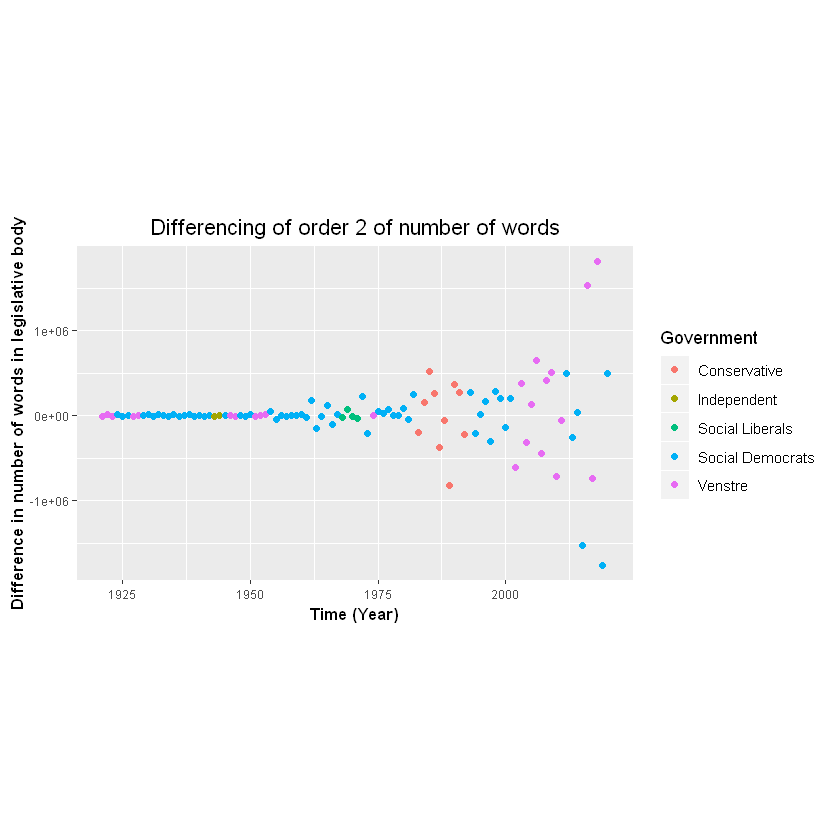

In [5]:
N <- length(ds$NumberWords)
diff_ds_order_2 <- data.frame(
    Date <- ds$Date[3:N],
    NumberWords = ds$NumberWords[3:N] - 2*ds$NumberWords[2:(N-1)] + ds$NumberWords[1:(N-2)],
    Government=ds$Government[3:N]
)

p1 <- ggplot(diff_ds_order_2, aes(Date, NumberWords, colour=Government), colour="black") + 
    geom_point() + 
    theme(
        aspect.ratio=0.6, 
        axis.text=element_text(size=7), 
        axis.title=element_text(size=10, face="bold"),
        plot.title = element_text(hjust = 0.5)
    ) +
    labs(x="Time (Year)", y="Difference in number of words in legislative body", size = 600) +
    ggtitle("Differencing of order 2 of number of words")

#ggsave(file="scatter.png", plot=p1, width=7)
p1

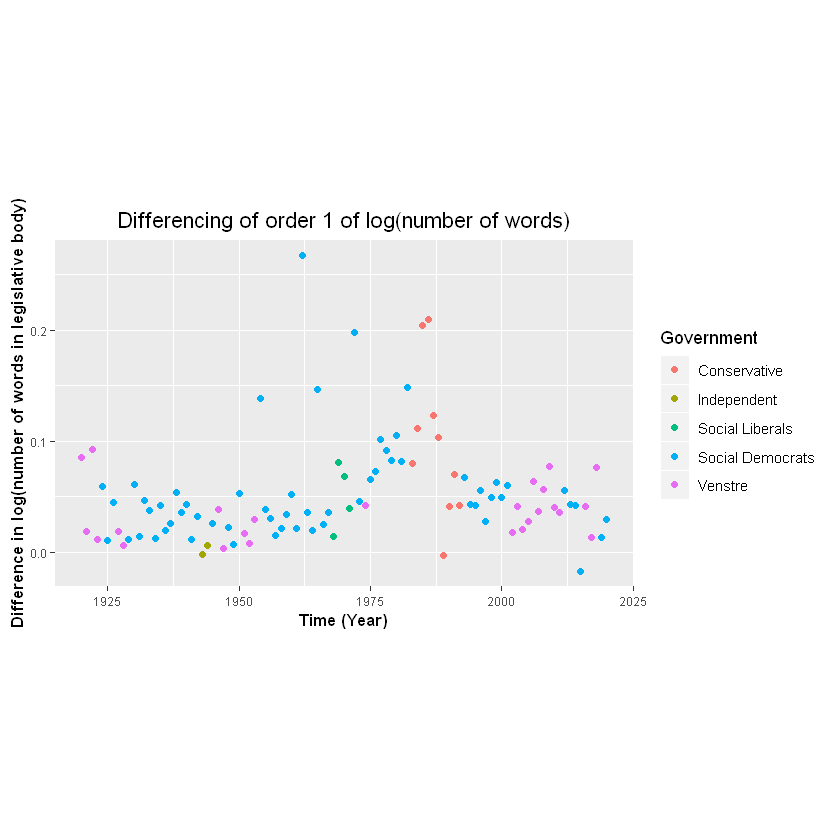

In [13]:
N <- length(ds$NumberWords)
ds_log_diff_order_2 <- data.frame(
    Date <- ds_log$Date[2:N],
    NumberWords = ds_log$NumberWords[2:N] - ds_log$NumberWords[1:(N-1)],
    Government=ds_log$Government[2:N]
)

p1 <- ggplot(ds_log_diff_order_2, aes(Date, NumberWords, colour=Government), colour="black") + 
    geom_point() + 
    theme(
        aspect.ratio=0.6, 
        axis.text=element_text(size=7), 
        axis.title=element_text(size=10, face="bold"),
        plot.title = element_text(hjust = 0.5)
    ) +
    labs(x="Time (Year)", y="Difference in log(number of words in legislative body)", size = 600) +
    ggtitle("Differencing of order 1 of log(number of words)")

#ggsave(file="scatter.png", plot=p1, width=7)
p1

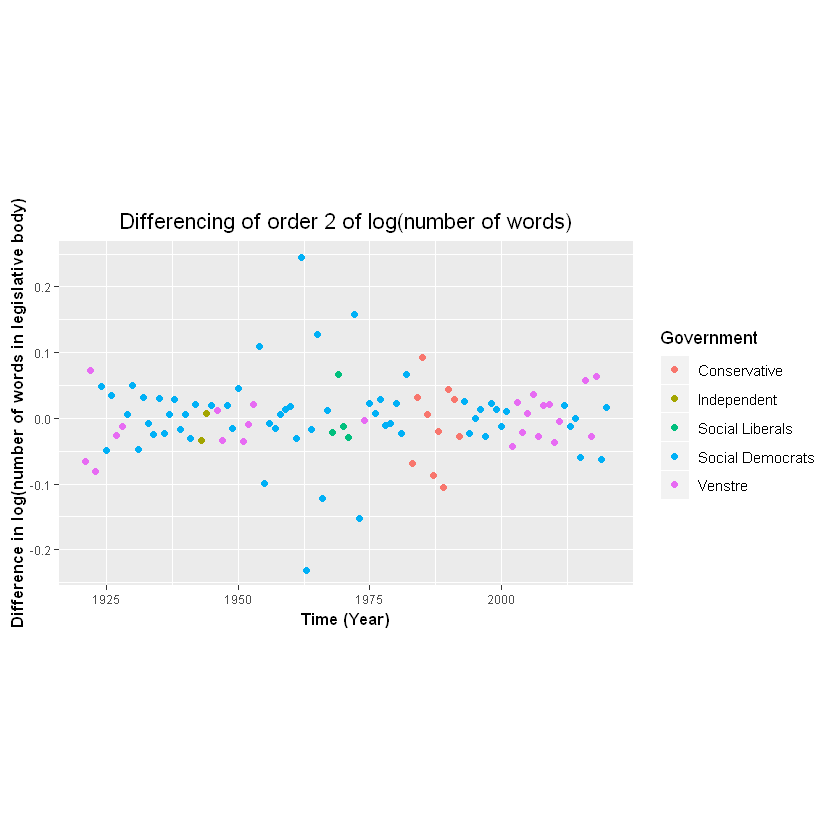

In [6]:
N <- length(ds$NumberWords)
ds_log_diff_order_2 <- data.frame(
    Date <- ds_log$Date[3:N],
    NumberWords = ds_log$NumberWords[3:N] - 2*ds_log$NumberWords[2:(N-1)] + ds_log$NumberWords[1:(N-2)],
    Government=ds_log$Government[3:N]
)

p1 <- ggplot(ds_log_diff_order_2, aes(Date, NumberWords, colour=Government), colour="black") + 
    geom_point() + 
    theme(
        aspect.ratio=0.6, 
        axis.text=element_text(size=7), 
        axis.title=element_text(size=10, face="bold"),
        plot.title = element_text(hjust = 0.5)
    ) +
    labs(x="Time (Year)", y="Difference in log(number of words in legislative body)", size = 600) +
    ggtitle("Differencing of order 2 of log(number of words)")

#ggsave(file="scatter.png", plot=p1, width=7)
p1

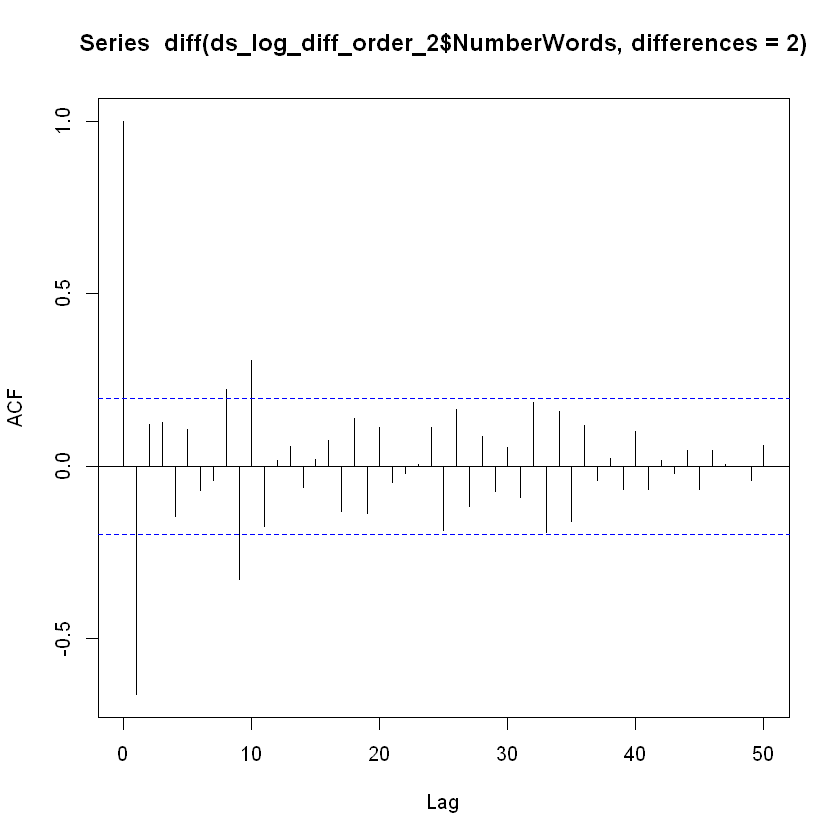

In [29]:
acf(diff(ds_log_diff_order_2$NumberWords, differences=2), lag.max=50)
#acf(diff_ds$NumberWords)

Seasonal? Likely not. We could expect to see some seasonality in lags being multiples of 4 (periodicity of election period), but we do not see anything clear.

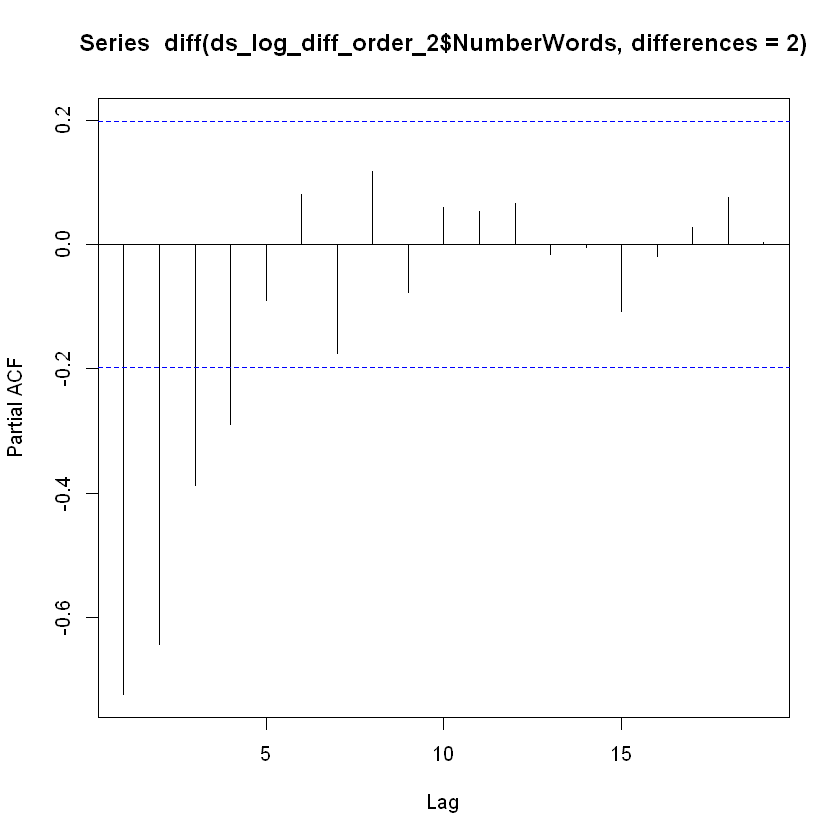

In [8]:
pacf(diff(ds_log_diff_order_2$NumberWords, differences=2))
#pacf(diff_ds$NumberWords)

# ARIMA model

In [45]:
m <- arima(ds_log_diff_order_2$NumberWords, order=c(0,0,1))
m


Call:
arima(x = ds_log_diff_order_2$NumberWords, order = c(0, 0, 1))

Coefficients:
         ma1  intercept
      0.1857     0.0524
s.e.  0.0866     0.0054

sigma^2 estimated as 0.002121:  log likelihood = 167.54,  aic = -329.08

log likelihood is higher for first model (IMA(0,1) model).

In [46]:
predict(m, 10)

ERROR while rich displaying an object: Error in if (many_rows) {: argument har længden nul

Traceback:
1. FUN(X[[i]], ...)
2. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
3. tryCatchList(expr, classes, parentenv, handlers)
4. tryCatchOne(expr, names, parentenv, handlers[[1L]])
5. doTryCatch(return(expr), name, parentenv, handler)
6. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler)
7. repr::mime2repr[[mime]](obj)
8. repr_html.list(obj)
9. repr_list_g

$pred
Time Series:
Start = 102 
End = 111 
Frequency = 1 
 [1] 0.04970053 0.05235243 0.05235243 0.05235243 0.05235243 0.05235243
 [7] 0.05235243 0.05235243 0.05235243 0.05235243

$se
Time Series:
Start = 102 
End = 111 
Frequency = 1 
 [1] 0.04605530 0.04684274 0.04684274 0.04684274 0.04684274 0.04684274
 [7] 0.04684274 0.04684274 0.04684274 0.04684274


$\nabla^2 Y_t = \varepsilon_t + \theta_1 \varepsilon_{t-1} \quad\Leftrightarrow\quad Y_t = S^2(\varepsilon_t + \theta_1 \varepsilon_{t-1})$<br>

$\nabla^2 Y_t = Y_t - 2Y_{t-1} + Y_{t-2} = \varepsilon_t + \theta_1 \varepsilon_{t-1} \quad\Leftrightarrow\quad Y_t=2Y_{t-1}-Y_{t-2} + \varepsilon_t + \theta_1 \varepsilon_{t-1}$<br>

$E[Y_t]=2E[Y_{t-1}]-E[Y_{t-2}]$<br>
$\textrm{Cov}[Y_t,Y_t]=\textrm{Cov}[2Y_{t-1}-Y_{t-2} + \varepsilon_t + \theta_1 \varepsilon_{t-1}, 2Y_{t-1}-Y_{t-2} + \varepsilon_t + \theta_1 \varepsilon_{t-1}]$

$\textrm{Cov}[Y_t,Y_t]=\textrm{Cov}[2Y_{t-1}-Y_{t-2} + \varepsilon_t + \theta_1 \varepsilon_{t-1}, 2Y_{t-1}-Y_{t-2} + \varepsilon_t + \theta_1 \varepsilon_{t-1}]=4\textrm{Var}[Y_{t-1}]=4\textrm{Var}[Y_{t-1}]+4\textrm{Cov}[Y_{t-1},Y_{t-2}]+\textrm{Var}[Y_{t-2}]+\textrm{Var}[\varepsilon_t]+\theta_1^2\textrm{Var}[\varepsilon_{t-1}]+2\textrm{Cov}[2Y_{t-1},\theta_1\varepsilon_{t-1}]=4\textrm{Var}[Y_{t-1}]+4\textrm{Cov}[Y_{t-1},Y_{t-2}]+\textrm{Var}[Y_{t-2}]+\textrm{Var}[\varepsilon_t]+\theta_1^2\textrm{Var}[\varepsilon_{t-1}]+2\textrm{Cov}[2Y_{t-1},\theta_1\varepsilon_{t-1}]$

$2\textrm{Cov}[2Y_{t-1},\theta_1\varepsilon_{t-1}]=4\textrm{Cov}[2Y_{t-2}-Y_{t-3}+\varepsilon_{t-1}+\theta_1\varepsilon_{t-2},\theta_1\varepsilon_{t-1}]=4\textrm{Cov}[\varepsilon_{t-1},\theta_1\varepsilon_{t-1}]=4\theta_1\textrm{Var}[\varepsilon_{t}]$

In [ ]:
?arima

arima {stats},R Documentation
x,a univariate time series
order,"A specification of the non-seasonal part of the ARIMA model: the three integer components (p, d, q) are the AR order, the degree of differencing, and the MA order."
seasonal,"A specification of the seasonal part of the ARIMA model, plus the period (which defaults to frequency(x)). This should be a list with components order and period, but a specification of just a numeric vector of length 3 will be turned into a suitable list with the specification as the order."
xreg,"Optionally, a vector or matrix of external regressors, which must have the same number of rows as x."
include.mean,"Should the ARMA model include a mean/intercept term? The default is TRUE for undifferenced series, and it is ignored for ARIMA models with differencing."
transform.pars,"logical; if true, the AR parameters are transformed to ensure that they remain in the region of stationarity. Not used for method = ""CSS"". For method = ""ML"", it has been advantageous to set transform.pars = FALSE in some cases, see also fixed."
fixed,"optional numeric vector of the same length as the total number of parameters. If supplied, only NA entries in fixed will be varied. transform.pars = TRUE will be overridden (with a warning) if any AR parameters are fixed. It may be wise to set transform.pars = FALSE when fixing MA parameters, especially near non-invertibility."
init,"optional numeric vector of initial parameter values. Missing values will be filled in, by zeroes except for regression coefficients. Values already specified in fixed will be ignored."
method,"fitting method: maximum likelihood or minimize conditional sum-of-squares. The default (unless there are missing values) is to use conditional-sum-of-squares to find starting values, then maximum likelihood. Can be abbreviated."
n.cond,only used if fitting by conditional-sum-of-squares: the number of initial observations to ignore. It will be ignored if less than the maximum lag of an AR term.
